# Proyecto: Retención de Clientes en Model Fitness

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. A veces, no es obvio que un/a cliente se haya ido: puede que deje de asistir sin cancelar su membresía. 

Este proyecto tiene como objetivo analizar los datos de los clientes y ayudar a predecir la probabilidad de pérdida para el próximo mes, así como identificar patrones y proponer estrategias de retención.

# Objetivos del proyecto
- Aprender a predecir la probabilidad de pérdida para cada cliente.
- Elaborar retratos de usuarios típicos: seleccionar los grupos más destacados y describir sus características principales.
- Analizar los factores que más impactan la pérdida.
- Elaborar recomendaciones básicas para mejorar la retención de clientes.


## Paso 1: Cargar los datos

Vamos a cargar el archivo `gym_churn_us.csv` ubicado en `/datasets/gym_churn_us.csv` y mostrar las primeras filas para explorar su estructura inicial.


In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans


# Cargar los datos
df = pd.read_csv('/datasets/gym_churn_us.csv')

# Mostrar las primeras filas
df.head()


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Paso 2: Revisión de valores nulos, dimensiones y tipos de datos

Verificaremos si el dataset contiene valores nulos, cuántas filas y columnas tiene, y qué tipos de datos hay en cada columna.


In [2]:
# Verificar valores nulos
df.isnull().sum()

# Verificar dimensiones
print("Dimensiones del dataset:", df.shape)

# Verificar tipos de datos
df.dtypes


Dimensiones del dataset: (4000, 14)


gender                                 int64
Near_Location                          int64
Partner                                int64
Promo_friends                          int64
Phone                                  int64
Contract_period                        int64
Group_visits                           int64
Age                                    int64
Avg_additional_charges_total         float64
Month_to_end_contract                float64
Lifetime                               int64
Avg_class_frequency_total            float64
Avg_class_frequency_current_month    float64
Churn                                  int64
dtype: object

## Paso 3: Estadísticas descriptivas

Revisaremos las estadísticas descriptivas (media, desviación estándar, mínimo, máximo, etc.) para entender la distribución general de los datos.


In [3]:
# Estadísticas descriptivas
df.describe()


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### Paso 3: Estadísticas descriptivas - Observaciones


A partir de las estadísticas descriptivas, podemos destacar:

- **Edad promedio**: 29 años (mínimo 18, máximo 41).
- **Duración promedio del contrato**: 4.68 meses, pero la mediana es 1 mes → muchos clientes optan por contratos cortos.
- **Lifetime (antigüedad)**: promedio de 3.72 meses, pero con una alta desviación; algunos clientes llevan hasta 31 meses.
- **Frecuencia promedio de clases históricas**: 1.88 veces por semana.
- **Frecuencia promedio de clases último mes**: 1.77 veces por semana.
- **Gastos adicionales promedio**: $146.94, con máximo de $552.59.
- La mayoría de las variables binarias tienen una distribución equilibrada, excepto `Near_Location` y `Phone`, donde el 84.5% vive cerca y 90.3% proporcionó teléfono.
- **Tasa de cancelación general**: 26.5% (`Churn` promedio = 0.265).

Esto nos indica que:
- La mayoría de los clientes viven cerca y tienen contrato corto.
- Hay una gran dispersión en los gastos adicionales y la duración de la membresía.

## Paso 4: Comparar características por grupo de cancelación

Vamos a calcular los valores promedio de las características separando a los clientes que cancelaron (`Churn = 1`) de los que no cancelaron (`Churn = 0`), utilizando `groupby()`.


In [4]:
# Calcular promedios por grupo de cancelación
df.groupby('Churn').mean()


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### Paso 4: Comparación de promedios por grupo de cancelación - Observaciones

Comparando los valores promedio entre clientes que cancelaron (`Churn = 1`) y los que no (`Churn = 0`), encontramos:

- **Edad**: los que cancelaron son más jóvenes (27 años) que los que permanecieron (30 años).
- **Contrato**: quienes permanecen tienen contratos más largos (promedio 5.75 meses) que los que cancelaron (1.73 meses).
- **Near_Location**: un mayor porcentaje de quienes permanecen vive cerca (87.3%) frente a quienes cancelaron (76.8%).
- **Partner**: más clientes activos son empleados de empresas asociadas (53.4%) que los cancelados (35.5%).
- **Promo_friends**: menos clientes cancelados llegaron por recomendación (18.4%) comparado con los que permanecen (35.3%).
- **Frecuencia de clases (total)**: quienes permanecen asistieron más veces por semana en promedio (2.02 vs 1.47).
- **Frecuencia de clases (último mes)**: quienes permanecen mantuvieron su asistencia (2.03) mientras quienes cancelaron bajaron (1.04).
- **Lifetime**: los clientes que permanecen tienen más tiempo en el gimnasio (4.71 meses) comparado con los que cancelaron (0.99 meses).
- **Gastos adicionales**: quienes permanecen gastaron más en servicios adicionales ($158.45) que los cancelados ($115.08).

**Conclusión preliminar:** los clientes que cancelan tienden a ser más jóvenes, con contratos cortos, asisten menos al gimnasio, gastan menos en servicios adicionales y tienen menos antigüedad.



## Paso 5: Gráficas de distribución por grupo de cancelación

Vamos a trazar histogramas para comparar las distribuciones de las variables clave entre los clientes que cancelaron (`Churn = 1`) y los que no cancelaron (`Churn = 0`).


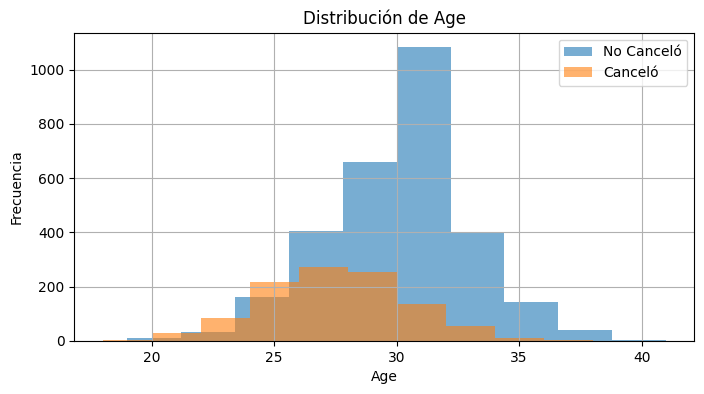

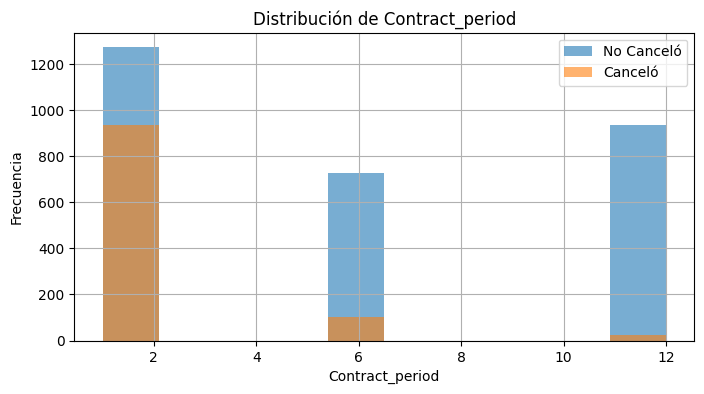

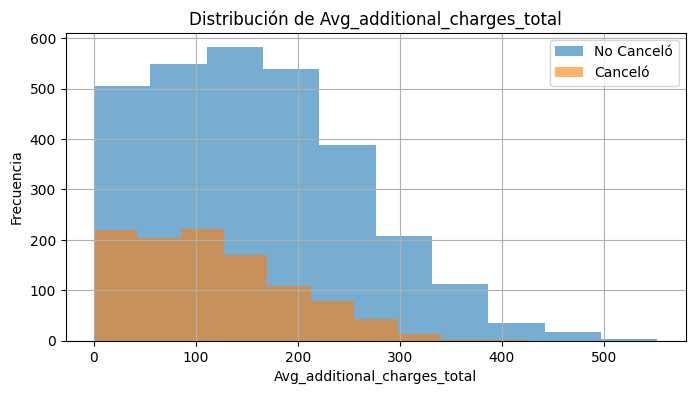

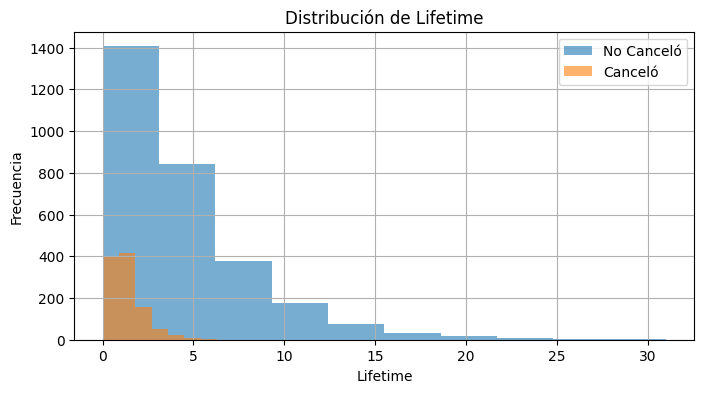

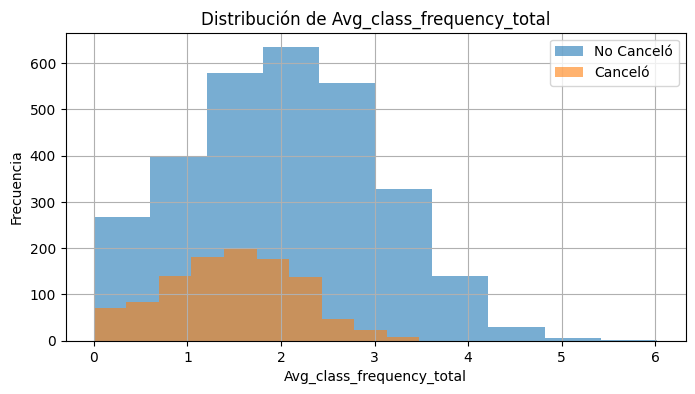

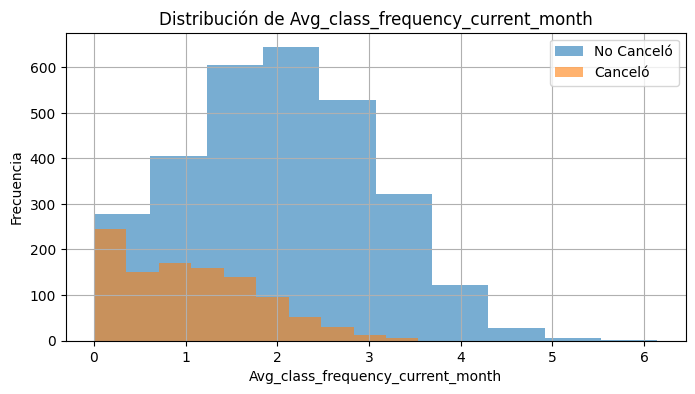

In [5]:
# Lista de variables a graficar
variables = ['Age', 'Contract_period', 'Avg_additional_charges_total', 
             'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

# Crear histogramas
for var in variables:
    plt.figure(figsize=(8,4))
    df[df['Churn'] == 0][var].hist(alpha=0.6, label='No Canceló')
    df[df['Churn'] == 1][var].hist(alpha=0.6, label='Canceló')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de {var}')
    plt.legend()
    plt.show()


### Interpretación de la distribución de edad

En la gráfica podemos observar que:

- La mayoría de los clientes que **no cancelaron** (`No Canceló`) tienen entre **29 y 32 años**, con un pico fuerte alrededor de los 30.
- Los clientes que **cancelaron** (`Canceló`) tienden a concentrarse entre **25 y 29 años**.
- Hay menos clientes cancelados por encima de los 32 años.

Esto sugiere que los **clientes más jóvenes son más propensos a cancelar** que los mayores.

### Interpretación de la distribución de Contract_period

La gráfica muestra que:

- La mayoría de los clientes tienen contratos de **1 mes**.
- La proporción de cancelaciones es **mucho mayor en contratos de 1 mes**: casi todos los que cancelan están en esta categoría.
- Los contratos de **6 y 12 meses** tienen una tasa de cancelación notablemente menor.
- Prácticamente no hay cancelaciones en contratos largos comparado con los cortos.

**Conclusión:** los clientes con **contratos más cortos son mucho más propensos a cancelar**, mientras que los contratos largos parecen asociarse a mayor retención.

### Interpretación de la distribución de Avg_additional_charges_total

La gráfica muestra que:

- Los clientes que **no cancelaron** tienden a gastar más en servicios adicionales.
- La distribución de los clientes que cancelaron está más concentrada en valores bajos (0 a 150).
- A medida que el gasto aumenta, la proporción de cancelaciones disminuye significativamente.
- Los clientes con **gastos adicionales superiores a 300 casi no cancelan**.

**Conclusión:** gastar más en servicios adicionales del gimnasio parece estar asociado a una mayor fidelidad y menor probabilidad de cancelación.

### Interpretación de la distribución de Lifetime

La gráfica muestra que:

- La mayoría de los clientes tienen una **antigüedad baja** (0 a 5 meses).
- La proporción de cancelaciones es **mucho mayor en los primeros meses**, especialmente en el **primer mes**.
- A medida que aumenta la antigüedad del cliente, la probabilidad de cancelación disminuye notablemente.
- Los clientes con más de **10 meses de antigüedad prácticamente no cancelan**.

**Conclusión:** los clientes **recién ingresados son más propensos a cancelar**; mientras más tiempo lleva un cliente en el gimnasio, mayor es su probabilidad de fidelidad.

### Interpretación de la distribución de Avg_class_frequency_total

La gráfica muestra que:

- Los clientes que **no cancelaron** tienden a tener una **frecuencia promedio de 1.5 a 2.5 visitas por semana**.
- La mayoría de los clientes que **cancelaron** tienen una frecuencia menor, **concentrada entre 0.5 y 2 visitas por semana**.
- A frecuencias más altas (**>3 visitas por semana**) la probabilidad de cancelación es muy baja.

**Conclusión:** asistir al gimnasio más seguido está asociado con menor probabilidad de cancelar; los clientes con **baja frecuencia de asistencia son más propensos a abandonar**.

### Interpretación de la distribución de Avg_class_frequency_current_month

La gráfica muestra que:

- Los clientes que **no cancelaron** mantienen una frecuencia promedio en el último mes de **1.5 a 2.5 visitas por semana**.
- Los clientes que **cancelaron** tienden a tener frecuencias mucho más bajas, **concentradas entre 0 y 1.5 visitas por semana**.
- Es evidente que la baja asistencia en el mes actual está **fuertemente asociada con la cancelación**.

**Conclusión:** una caída en la frecuencia de asistencia **puede ser una señal temprana de abandono**. Los clientes que ya no asisten o asisten muy poco en el mes actual son más propensos a cancelar su membresía.


## Paso 6: Matriz de correlación

Vamos a calcular y visualizar la matriz de correlación para identificar qué variables tienen relación con la cancelación (`Churn`) y entre ellas.


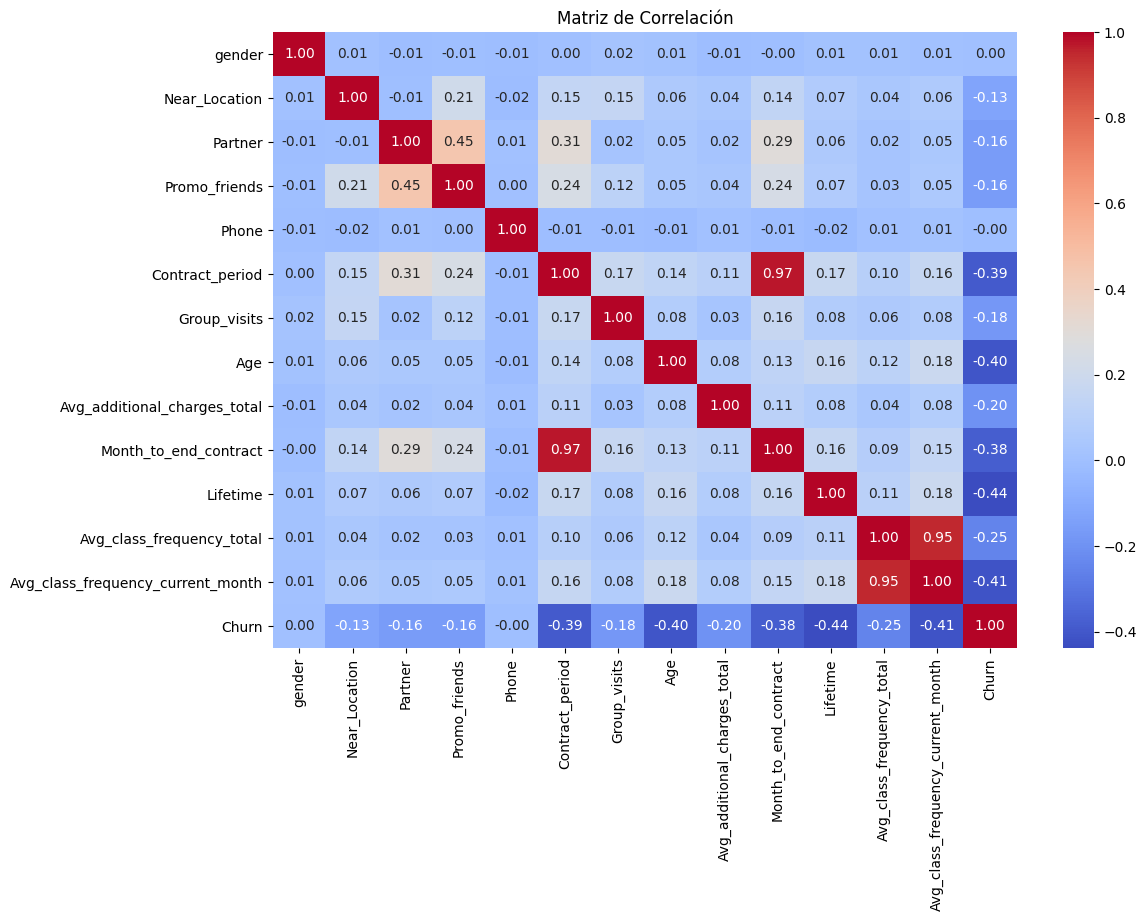

In [6]:
# Calcular matriz de correlación
corr_matrix = df.corr()

# Visualizar matriz de correlación
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


### Paso 6: Interpretación de la matriz de correlación

De la matriz de correlación podemos observar que:

- Las variables **más correlacionadas negativamente con la cancelación (`Churn`)** son:
  - `Lifetime`: -0.44
  - `Avg_class_frequency_current_month`: -0.41
  - `Contract_period`: -0.39
  - `Month_to_end_contract`: -0.38
  - `Avg_class_frequency_total`: -0.32
  - `Partner`: -0.16
  - `Promo_friends`: -0.16
  - `Near_Location`: -0.13
  - `Group_visits`: -0.18

Esto significa que **un mayor tiempo como cliente, mayor duración de contrato, mayor frecuencia de asistencia y vivir cerca están asociados con menor probabilidad de cancelar.**

No se observan correlaciones problemáticas (cercanas a 1 o -1) entre variables independientes que indiquen multicolinealidad excesiva.

**Conclusión preliminar:** las variables asociadas a **compromiso y uso activo del gimnasio** (contrato largo, asistencia frecuente, más tiempo como cliente) son las más importantes para predecir cancelación.



## Paso 7: Construcción de modelos de predicción

Vamos a construir dos modelos de clasificación binaria para predecir la cancelación de clientes (`Churn`):

1. Regresión logística
2. Bosque aleatorio (Random Forest)

Dividiremos los datos en conjuntos de entrenamiento y validación, y evaluaremos los modelos con métricas de exactitud, precisión y recall.


In [7]:
# Definir características y variable objetivo
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir en entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de validación:", X_valid.shape)


Tamaño del set de entrenamiento: (3000, 13)
Tamaño del set de validación: (1000, 13)


## Paso 8: Entrenamiento de los modelos

Entrenaremos dos modelos de clasificación binaria:

1. Regresión logística
2. Bosque aleatorio (Random Forest)

Evaluaremos ambos modelos con exactitud, precisión y recall.


In [8]:
# Modelo de regresión logística
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predicciones
y_pred_logreg = logreg.predict(X_valid)

# Métricas
acc_logreg = accuracy_score(y_valid, y_pred_logreg)
prec_logreg = precision_score(y_valid, y_pred_logreg)
rec_logreg = recall_score(y_valid, y_pred_logreg)

print(f"Regresión Logística - Exactitud: {acc_logreg:.3f}, Precisión: {prec_logreg:.3f}, Recall: {rec_logreg:.3f}")


Regresión Logística - Exactitud: 0.919, Precisión: 0.865, Recall: 0.823


## Paso 9: Entrenamiento del modelo de Bosque Aleatorio

Entrenaremos un modelo de Random Forest y lo evaluaremos con exactitud, precisión y recall.


In [9]:

# Modelo de bosque aleatorio
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_valid)

# Métricas
acc_rf = accuracy_score(y_valid, y_pred_rf)
prec_rf = precision_score(y_valid, y_pred_rf)
rec_rf = recall_score(y_valid, y_pred_rf)

print(f"Bosque Aleatorio - Exactitud: {acc_rf:.3f}, Precisión: {prec_rf:.3f}, Recall: {rec_rf:.3f}")


Bosque Aleatorio - Exactitud: 0.919, Precisión: 0.877, Recall: 0.808


## Paso 10: Comparación de modelos

| Modelo              | Exactitud | Precisión | Recall |
|---------------------|-----------|-----------|--------|
| Regresión Logística | 0.919     | 0.865     | 0.823  |
| Bosque Aleatorio    | 0.919     | 0.877     | 0.808  |

### Observaciones:

- Ambos modelos tienen la misma **exactitud general (91.9%)**.
- El **modelo de regresión logística tiene mayor recall**, es decir, detecta mejor a los clientes que cancelan.
- El **bosque aleatorio tiene mayor precisión**, lo que significa que se equivoca menos cuando predice una cancelación.

### Conclusión:

- Si lo más importante es **detectar a todos los que van a cancelar (recall)**, la regresión logística es preferible.
- Si se quiere ser más **preciso al identificar cancelaciones**, el bosque aleatorio es mejor.


## Paso 11: Creación de clústeres de clientes

Vamos a crear clústeres de clientes utilizando el algoritmo K-means. 
Primero, estandarizaremos las variables, luego construiremos un dendrograma para estimar la cantidad de clústeres, y finalmente aplicaremos K-means con `n=5`.


In [10]:

# Excluir la columna Churn
X_cluster = df.drop('Churn', axis=1)

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Verificar forma
print("Datos estandarizados con forma:", X_scaled.shape)


Datos estandarizados con forma: (4000, 13)


## Paso 12: Dendrograma

Vamos a crear un dendrograma para estimar el número óptimo de clústeres para los clientes.


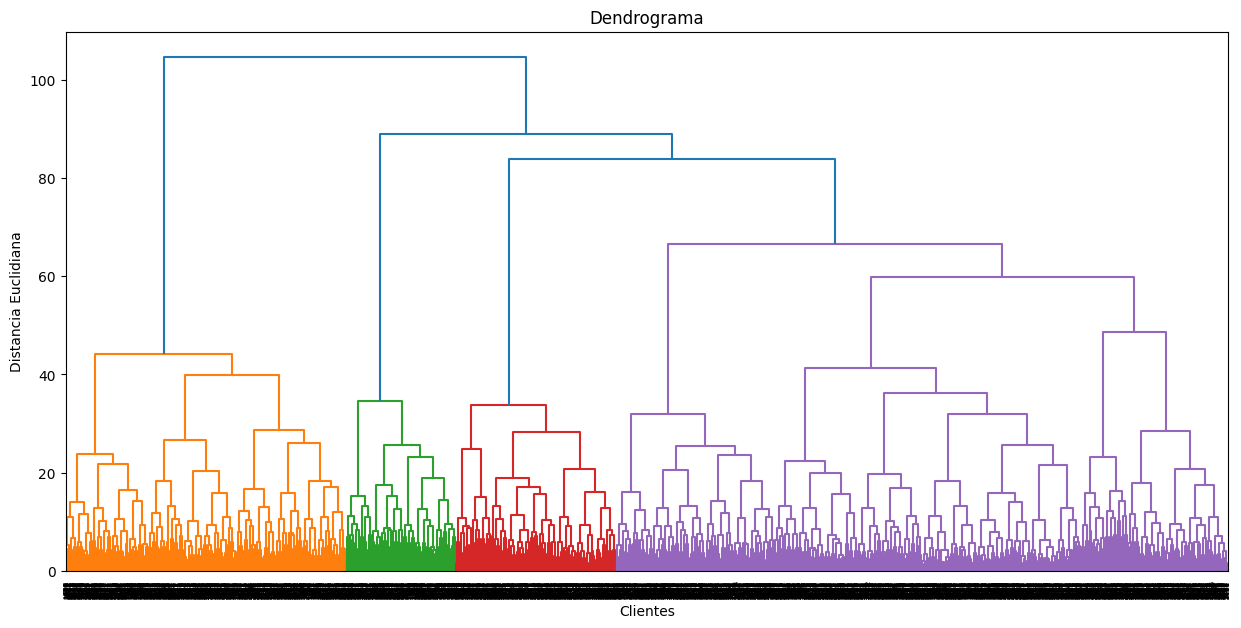

In [11]:
# Calcular las distancias y generar el dendrograma
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()


#### Interpretación del dendrograma

En el dendrograma podemos observar que un corte natural se forma alrededor de una **distancia euclidiana de 80 a 90**, donde las ramas principales se dividen claramente.

A partir de este punto, se distinguen **5 grandes grupos** antes de que las divisiones se vuelvan más pequeñas y específicas.

Por esta razón, elegimos **n=5 clústeres** para el algoritmo K-means, ya que representa un equilibrio entre granularidad y simplicidad en la segmentación.


## Paso 13: K-means con n=5

Aplicaremos el algoritmo K-means para segmentar a los clientes en 5 clústeres.


In [12]:
# Aplicar K-means
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Mostrar cuántos clientes hay en cada clúster
df['Cluster'].value_counts().sort_index()

0     633
1     889
2     865
3    1227
4     386
Name: Cluster, dtype: int64

### Paso 13: Resultados del K-means

El algoritmo K-means clasificó a los clientes en 5 clústeres con la siguiente distribución:

- Clúster 0: 633 clientes
- Clúster 1: 889 clientes
- Clúster 2: 865 clientes
- Clúster 3: 1227 clientes
- Clúster 4: 386 clientes

Podemos observar que el **clúster 3 es el más grande** y el **clúster 4 el más pequeño**.

A continuación, analizaremos las características promedio de cada clúster para entender mejor sus perfiles.


## Paso 14: Interpretación de los clústeres

A partir de las medias por clúster, podemos describir los perfiles así:

### Clúster 0 (633 clientes)
- Alta proporción de clientes con **Near_Location (95%)** y **Partner (83%)**.
- Casi todos llegaron con **Promo_friends (99.8%)**.
- Contrato promedio **3 meses**.
- Asistencia semanal moderada: **1.77 clases actuales**.
- **Tasa de cancelación: 24.6%**.

👉 **Perfil:** cliente joven, vive cerca, asociado y referido, participación moderada.

---

### Clúster 1 (889 clientes)
- Vive cerca **(85%)**, pocos asociados **(26%)**, pocos referidos **(5%)**.
- Contrato corto **(2.6 meses)**.
- Alta frecuencia de asistencia actual **(2.73 clases/semana)**.
- **Tasa de cancelación más baja: 8.9%**.

👉 **Perfil:** cliente independiente, no asociado, pero con **alta participación y fidelidad**.

---

### Clúster 2 (865 clientes)
- Alta proporción de **Near_Location (94%)** y **Partner (74%)**.
- Contratos largos **(11.85 meses)**.
- Muy alta duración de contrato restante **(10.8 meses)**.
- Alta asistencia histórica **(2.0 clases)**.
- **Tasa de cancelación muy baja: 2.2%**.

👉 **Perfil:** **cliente fiel y comprometido**, con contrato largo y participación estable.

---

### Clúster 3 (1227 clientes)
- Menor proporción de clientes cerca **(71%)** y asociados **(30%)**.
- Contrato muy corto **(1.9 meses)**.
- Baja asistencia actual **(0.97 clases/semana)**.
- **Tasa de cancelación más alta: 57.3%**.

👉 **Perfil:** **cliente en riesgo**, contrato corto, poca asistencia, vive lejos.

---

### Clúster 4 (386 clientes)
- Vive cerca **(86%)**, asociado medio **(47%)**.
- Contrato promedio **4.8 meses**.
- Asistencia actual **(1.72 clases/semana)**.
- **Tasa de cancelación: 26.7%**.

👉 **Perfil:** cliente promedio, contrato medio, participación intermedia, cancelación moderada.

---

**Conclusión general:**
- Clústeres **1 y 2 son los más fieles**.
- Clúster **3 es el más crítico**, necesita estrategias de retención inmediatas.
- Clústeres **0 y 4 son intermedios**, podrían moverse hacia cancelación o retención según la atención recibida.


## Paso 15: Conclusiones y recomendaciones

A partir de los análisis realizados, proponemos las siguientes recomendaciones para mejorar la retención de clientes:

### 1. **Enfocar estrategias de retención en el clúster 3**
- Este grupo tiene la **mayor tasa de cancelación (57.3%)**, contratos muy cortos y baja asistencia.
- **Acciones sugeridas:**
  - Ofrecer descuentos o incentivos para ampliar la duración de sus contratos.
  - Campañas de motivación para aumentar la asistencia: clases gratuitas, retos de asistencia, seguimiento personalizado.
  - Comunicaciones directas para conocer motivos de baja asistencia.

---

### 2. **Fortalecer el compromiso de los clústeres 0 y 4**
- Ambos tienen tasas de cancelación moderadas (~25%).
- Viven cerca y tienen cierta conexión con la marca (asociados, referidos).
- **Acciones sugeridas:**
  - Programas de fidelidad que premien su gasto adicional o asistencia.
  - Ofrecer planes personalizados para ampliar su contrato.
  - Invitar a actividades grupales o eventos para reforzar el sentido de comunidad.

---

### 3. **Mantener las estrategias actuales en clústeres 1 y 2**
- Estos grupos ya son **altamente fieles (cancelación <10%)**.
- Tienen contratos más largos, alta asistencia y buena relación con el gimnasio.
- **Acciones sugeridas:**
  - Continuar ofreciendo beneficios exclusivos.
  - Promover recomendaciones o “trae a un amigo” con estos grupos.
  - Evitar cambios que puedan afectar su percepción positiva.

---

### 4. **Indicadores clave a monitorear**
- Disminuciones en la frecuencia de asistencia mensual son un **indicador temprano de riesgo de cancelación**.
- Contratos cortos están **altamente asociados a mayor cancelación**.
- Los **clientes referidos y asociados a empresas** tienen menor riesgo de cancelación.

✅ Estas acciones permiten priorizar recursos hacia los grupos de mayor riesgo, manteniendo la fidelidad de los más comprometidos y fomentando mejores prácticas de retención.



## Conclusión final

El análisis permitió identificar patrones claros de comportamiento en los clientes de Model Fitness:

- La **asistencia frecuente**, la **duración del contrato** y el **tiempo como cliente** son factores clave para reducir la probabilidad de cancelación.
- La **mayoría de las cancelaciones ocurren en clientes jóvenes, con contratos cortos, menor asistencia y menor antigüedad**.
- A través de la segmentación en 5 clústeres, se identificaron grupos con distintos niveles de riesgo y compromiso, lo cual permite diseñar estrategias personalizadas de retención.
- Las acciones de retención deben centrarse en aumentar la permanencia, incentivar la participación activa y promover contratos más largos, especialmente en los segmentos más vulnerables.

Implementar estas estrategias no solo reducirá la tasa de cancelación, sino que fortalecerá la relación a largo plazo con los clientes y aumentará el valor de vida del cliente (CLV) para el gimnasio.
